Regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA):

<i>Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.</i>

In [101]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('ggplot')

data = pd.read_csv("ex2data2.txt", header=None, names=['test1', 'test2', 'Result']) 
data.head()

,test1,test2,Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


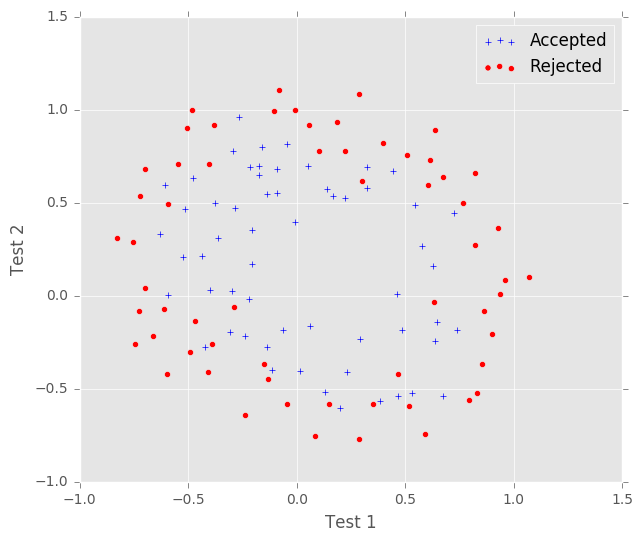

In [102]:
# Visiualizing the data...
accept = data[data['Result'].isin([1])]  
reject = data[data['Result'].isin([0])]

fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(accept['test1'], accept['test2'], marker='+', c='b',label='Accepted')  
ax.scatter(reject['test1'], reject['test2'], marker='o', c='r', label='Rejected')  
ax.set_xlabel('Test 1')  
ax.set_ylabel('Test 2')
ax.legend()  

In [103]:
# Initially, the classifier seems very weak in modeling the data 
# the reason is the pecular distribution of data points in a way 
# that makes it hard to use a linear model

X = data[['test1', 'test2']].values
y = np.array(data['Result'])
clf = LogisticRegression(n_jobs=-1, solver='liblinear')
cross_val_score(clf, X, y, cv= 3)

array([ 0.225     ,  0.43589744,  0.30769231])

"Figure shows that our dataset cannot be separated into positive and negative examples by a straight line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary."

- Feature Mapping

One way to fit the data better is to create more features from each data point by mapping the features into all polynomial terms up to the nth power (In this case n = 6). Feature mapping allows us to build a more expressive classifier, but it also is more susceptible to overfitting:

In [104]:
from sklearn.preprocessing import PolynomialFeatures

# Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than 
# or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], 
# the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

poly = PolynomialFeatures(6)
# grab data in the two columns and create a numpy array of size 118 by 2
X = data[['test1', 'test2']].values
X = poly.fit_transform(X)

X.shape
# As a result of this mapping, our vector of two features (the scores on
# two tests) has been transformed into a 28-dimensional vector.

(118, 28)

In [106]:
# Algorithm to use in the optimization problem:
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ is
# faster for large ones. For multiclass problems, only ‘newton-cg’, ‘sag’ and ‘lbfgs’ handle multinomial loss; 
# ‘liblinear’ is limited to one-versus-rest schemes. ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty.

clf = LogisticRegression(n_jobs=-1, solver='liblinear', penalty='l2')
cross_val_score(clf, X, y, cv= 3)

array([ 0.6       ,  0.71794872,  0.53846154])

In [107]:
# We also note that here in our example L1 regularization seems to be working better 
clf = LogisticRegression(n_jobs=-1, solver='liblinear', penalty='l1')
cross_val_score(clf, X, y, cv= 3)

array([ 0.725     ,  0.71794872,  0.66666667])